# Web <em>of</em> Science Crawler

This program is an enhancement of the version created by Santana (2018) to collect data from available publications on the search for a term on the Web of Science website.

In this release it is possible to perform authentication automatically through Selenium, including reuse of authentication, as well as advanced searches using WoS proprietary TAGS.

Authors: De Souza, Edson Melo; Storópoli, José Eduardo; Alves, Wonder Alexandre Luz<br>
Version: 3.0 (2019)<br>

Original source: Santana, Octavio (2018) - https://github.com/Octavio-Santana/Web-Science

---

## Retrieved Data

*Some data may be incomplete

| Field                   | Description                                      |
|-------------------------|--------------------------------------------------|
| wos_id                  | Web of Science article ID                        |
| doi                     | Digital Object Identifier                        |
| title                   | Article title                                    |
| year                    | Year of publication                              |
| author                  | Authors byline                                   |
| n_references            | References in article                            |
| n_cited                 | Citation count                                   |
| journal                 | Journal name                                     |
| impact_factor           | Impact factor (IF)                               |
| impact_factor_year      | Year of IF                                       |
| j_impact_factor_5_years | Shows the long-term citation trend for a journal |
| issn                    | ISSN journal                                     |
| eissn                   | Eletronic ISSN                                   |
| author_keywords         | Keywords informed by the author                  |
| keywords_plus           | Provides additional keywords                     |
| research_area           | Research area                                    |
| abstract                | Full abstract                                    |


## Instructions

<ul>
    <li>Its necessary set the <strong>language to English</strong> into Web <em>of </em>Science.</li>
    <li>You can search any term using WoS (Web of Science) tags (see site). See the example below in the "search_term" variable.</li>
    <li>Do not use commas to compose the search expression.</li>
    <li>At the end of the processing a resulting file will be generated with the analysis of the data and named as "<strong>Search Term</strong>".</li>
    <li>For further queries, repeat the procedures.</li>
    <li>This notebook shows a example with term "<strong>artificial intelligence in medicine</strong>"</li>
</ul>

## Input data to search
Insert the search term below in variable <strong>search_term</strong>

WoS provides a broad set of tags for use in search. For more information, see the instructions at: [WoS Advanced Search](https://apps.webofknowledge.com/WOS_AdvancedSearch_input.do?SID=7BtkvvzULX57U1SFGUR&product=WOS&search_mode=AdvancedSearch)

Usage example: 'TI=author* position'

In [1]:
# Search term usage example
search_term = 'TI=machine learning in medicine'

#path to ChromeDriver
pathChromedriver='.\chromedriver.exe'

from WoSExtractor import *
wos = WoSExtractor(pathChromedriver) 
df_article = wos.search(search_term)


Found 13 links to scrap .... starting
Scraping 00013: Machine learning for data mining i...

## Save data recovered to file

In [2]:
df_article.to_csv(wos.file_name(search_term) + '_data.csv', index=False)

## Convert values to Excel format

In [3]:
import pandas as pd
df = pd.read_csv(wos.file_name(search_term) + '_data.csv')
df.to_excel(wos.file_name(search_term) + '_result.xlsx', header=True, index=False, encoding='utf-8')

## Show results

In [4]:
print('Recovered articles:', df.shape[0], '\n')
df.head(5)

Recovered articles: 13 



,wos_id,doi,title,year,author,n_references,n_cited,journal,impact_factor,impact_factor_year,j_impact_factor_5_years,issn,eissn,author_keywords,keywords_plus,research_area,abstract
0,WOS:000466056900007,10.1016/j.inffus.2018.09.012,Machine learning for integrating data in biolo...,2019,"Zitnik, M; Nguyen, F; Wang, B; Leskovec, J; Go...",352,12,INFORMATION FUSION,10.716,2018,8.875,1566-2535,1872-6305,COMPUTATIONAL BIOLOGY;PERSONALIZED MEDICINE;SY...,DRUG-DRUG INTERACTION;GENOME-WIDE ASSOCIATION;...,COMPUTER SCIENCE,New technologies have enabled the investigatio...
1,WOS:000476719700001,10.1155/2019/6847685,Evaluation and Identification of the Neuroprot...,2019,"Yang, SL; Shen, YJ; Lu, WD; Yang, YL; Wang, HG...",42,0,BIOMED RESEARCH INTERNATIONAL,2.197,2018,2.885,2314-6133,2314-6141,NaN,HEART-DISEASE;RANDOM FOREST;CLASSIFICATION;UPD...,BIOTECHNOLOGY & APPLIED MICROBIOLOGY;RESEARCH ...,"Xiaoxuming decoction (XXMD), a classic traditi..."
2,WOS:000463992600010,10.1371/journal.pone.0213836,Dynamic multi-outcome prediction after injury:...,2019,"Christie, SA; Conroy, AS; Callcut, RA; Hubbard...",46,0,PLOS ONE,2.776,2018,3.337,1932-6203,NaN,NaN,SEVERITY SCORE;APACHE-II;CLASSIFICATION;TRANSF...,SCIENCE & TECHNOLOGY,Objective\n\nMachine learning techniques have ...
3,WOS:000463679700001,10.3389/fmolb.2019.00019,Applying Machine Learning of Erythrocytes Dyna...,2019,"Rafea, M; Elkafrawy, P; Nasef, MM; Elnemr, R; ...",29,0,FRONTIERS IN MOLECULAR BIOSCIENCES,0.000,0,0.000,NaN,2296-889X,MASS SPECTROMETRY;DISORDERS DIAGNOSIS;ERYTHROC...,BIOMARKER DISCOVERY;CANCER;DIAGNOSTICS;PROTEOM...,BIOCHEMISTRY & MOLECULAR BIOLOGY,Erythrocytes Dynamic Antigens Store (EDAS) is ...
4,WOS:000471140100004,10.1136/bmjstel-2017-000289,Effective resource management using machine le...,2019,"Williams, A; Mekhail, AM; Williams, J; McCord,...",17,2,BMJ SIMULATION & TECHNOLOGY ENHANCED LEARNING,0.000,0,0.000,2056-6697,NaN,NaN,ELECTRONIC HEALTH RECORDS,HEALTH CARE SCIENCES & SERVICES,Background The field of medicine is rapidly be...


# Import libraries to show result

In [5]:
# Import libraries
import warnings
warnings.simplefilter("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Data Analisys
Display the number of publications between year 2000 and and actual date available in Web of Science

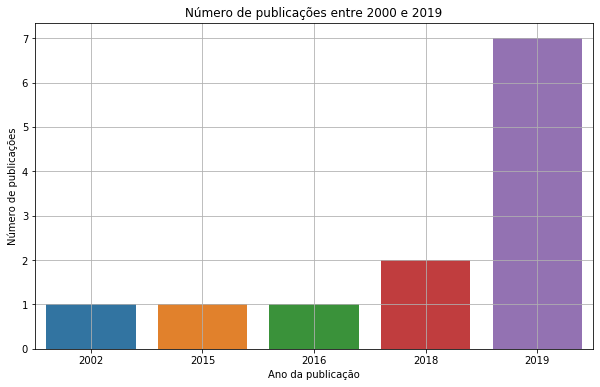

In [6]:
fig, ax1 = plt.subplots(nrows=1, figsize=(10,6))
ax1 = sns.countplot(x=df.loc[df.year>=2000, 'year'], ax=ax1) ## colocar uma variável para o ano
ax1.set_title('Número de publicações entre 2000 e 2019', fontsize=12)
ax1.set_xlabel('Ano da publicação', fontsize=10)
ax1.set_ylabel('Número de publicações', fontsize=10)
ax1.grid(True)
plt.savefig("publicacoes_por_ano.png", dpi=300)
plt.show()

#### Total Authors
Display total number of authors in articles have already published on the term of search

In [7]:
author = [name.split('; ') for name in df.author.values]
nomes = list({name 
              for names in author 
              for name in names})
print("{} authors have already published on the term of search".format(len(nomes)))

73 authors have already published on the term of search


#### Total Journals Published
Display journals and/or conferences related to the search theme

In [8]:
journals = list({paper for paper in df.journal})
print("{} journals and/or conferences related to the search theme".format(len(journals)))

13 journals and/or conferences related to the search theme


### Count number of publications
<ul>
    <li>Authrs: popular_authors</li>
    <li>Journals: popular_journals</li>
</ul>

#### Top 10 Authors

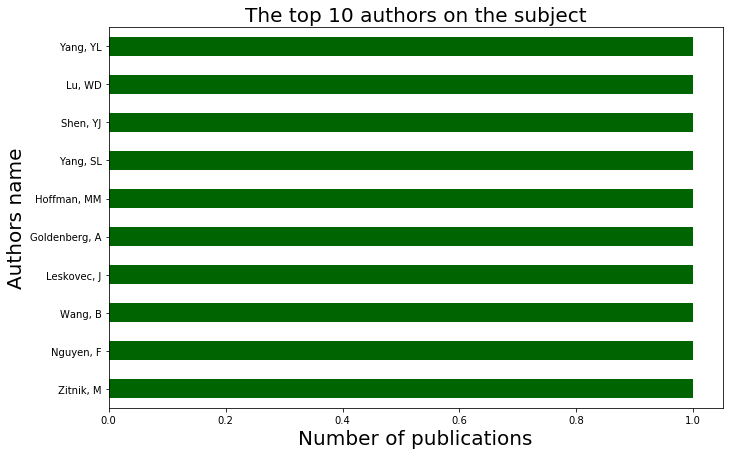

In [9]:
from collections import Counter
popular_authors = Counter(name
                         for names in author
                         for name in names).most_common()

popular_journals = Counter(df.journal.values).most_common()

def popular(coluna, popular_coluna):
    popular = {}
    popular[coluna] = []
    popular['count'] = []
    for col, count in popular_coluna:
        popular[coluna].append(col)
        popular['count'].append(count)
    
    return pd.DataFrame(data=popular)

df_popular_authors = popular('author', popular_authors)
df_popular_authors.head(10).set_index('author').sort_values('count', ascending=True).plot(kind='barh', 
                                                                                  figsize=(11,7), 
                                                                                  grid=False, 
                                                                                  color='darkgreen', 
                                                                                  legend=False)
plt.title('The top 10 authors on the subject', fontsize=20)
plt.xlabel('Number of publications', fontsize=20)
plt.ylabel('Authors name', fontsize=20)
plt.savefig("top_10_authors.png", dpi=300)
plt.show()

#### Top 10 Journals

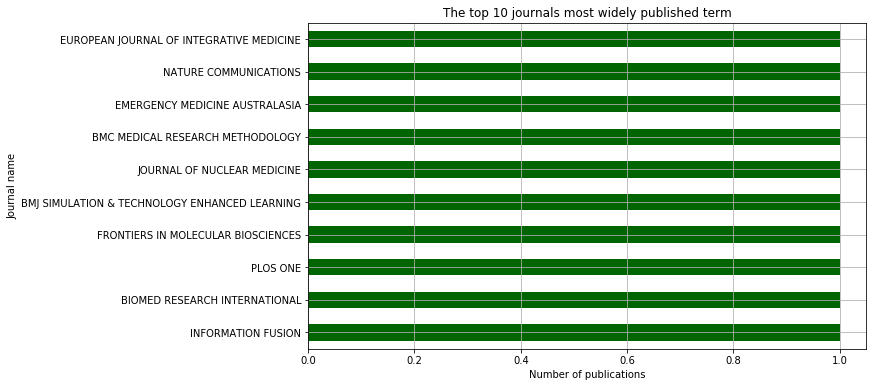

In [10]:
df_popular_journals = popular('journal', popular_journals)
df_popular_journals.head(10).set_index('journal').sort_values('count', ascending=True).plot(kind='barh', 
                                                                                  figsize=(10,6), 
                                                                                  grid=True, 
                                                                                  color='darkgreen', 
                                                                                  legend=False)
plt.title('The top 10 journals most widely published term', fontsize=12)
plt.xlabel('Number of publications', fontsize=10)
plt.ylabel('Journal name', fontsize=10)
plt.savefig("amount_of_periodicals.png", dpi=300)
plt.show()

### Show the best 5 Journals Impact Factor 

In [11]:
df_cited = df.sort_values('impact_factor', ascending=False)
df_cited.head(5)

,wos_id,doi,title,year,author,n_references,n_cited,journal,impact_factor,impact_factor_year,j_impact_factor_5_years,issn,eissn,author_keywords,keywords_plus,research_area,abstract
10,WOS:000364632100010,10.1161/CIRCULATIONAHA.115.001593,Machine Learning in Medicine,2015,"Deo, RC",41,220,CIRCULATION,23.054,2018,20.469,0009-7322,1524-4539,ARTIFICIAL INTELLIGENCE;COMPUTERS;PROGNOSIS;RI...,PRESERVED EJECTION FRACTION;HEART-FAILURE;PRED...,CARDIOVASCULAR SYSTEM & CARDIOLOGY,"Spurred by advances in processing power, memor..."
8,WOS:000419308000003,10.1038/s41467-017-02465-5,A machine learning approach to integrate big d...,2018,"Lee, SI; Celik, S; Logsdon, BA; Lundberg, SM; ...",63,14,NATURE COMMUNICATIONS,11.878,2018,13.811,2041-1723,NaN,NaN,ACUTE MYELOGENOUS LEUKEMIA;ACUTE LYMPHOBLASTIC...,SCIENCE & TECHNOLOGY,Cancers that appear pathologically similar oft...
0,WOS:000466056900007,10.1016/j.inffus.2018.09.012,Machine learning for integrating data in biolo...,2019,"Zitnik, M; Nguyen, F; Wang, B; Leskovec, J; Go...",352,12,INFORMATION FUSION,10.716,2018,8.875,1566-2535,1872-6305,COMPUTATIONAL BIOLOGY;PERSONALIZED MEDICINE;SY...,DRUG-DRUG INTERACTION;GENOME-WIDE ASSOCIATION;...,COMPUTER SCIENCE,New technologies have enabled the investigatio...
5,WOS:000462868200006,10.2967/jnumed.118.223495,Machine Learning in Nuclear Medicine: Part 1-I...,2019,"Uribe, CF; Mathotaarachchi, S; Gaudet, V; Smit...",28,3,JOURNAL OF NUCLEAR MEDICINE,7.308,2018,6.720,0161-5505,1535-5667,MACHINE LEARNING;ARTIFICIAL INTELLIGENCE;NUCLE...,CONVOLUTIONAL NEURAL-NETWORKS;DEEP;FEATURES;MODEL,"RADIOLOGY, NUCLEAR MEDICINE & MEDICAL IMAGING",Learning Objectives: On successful completion ...
11,WOS:000178201900005,10.1016/S0933-3657(02)00053-2,Analysis of respiratory pressure-volume curves...,2002,"Ganzert, S; Guttmann, J; Kersting, K; Kuhlen, ...",12,19,ARTIFICIAL INTELLIGENCE IN MEDICINE,3.574,2018,3.197,0933-3657,NaN,MACHINE LEARNING;DATA MINING;CLASSIFICATION;DE...,COMBINING MATHEMATICAL-MODELS;INTELLIGENT ALAR...,COMPUTER SCIENCE;ENGINEERING;MEDICAL INFORMATICS,We present a case study of machine learning an...
